Import Libraries

In [26]:
# loading dataset
import pandas as pd
import numpy as np
# settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
# visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
# EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

Load Dataset

In [2]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Pre-processing

In [3]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Check for balance of data

In [4]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

Looks balanced between our options. Scale the data to ensure no features are more or less important due to values

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Models
## Logisitic Regression

In [6]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Confusion Matrix")
print(lr_conf_matrix)
print("\nAccuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

Confusion Matrix
[[21  6]
 [ 3 31]]

Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



## Naive Bayes

In [7]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("Confusion Matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

GaussianNB()

Confusion Matrix
[[21  6]
 [ 3 31]]


Accuracy of Naive Bayes model: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



## Random Forest

In [8]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Confusion Matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=12)

Confusion Matrix
[[22  5]
 [ 3 31]]


Accuracy of Random Forest: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



## XGBoost

In [11]:
m4 = 'Extreme Gradient Boost: XGBoost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("Confusion Matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

[16:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=0.6,
              colsample_bynode=0.5, colsample_bytree=0.6, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=8, num_parallel_tree=1, random_state=27,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=27,
              subsample=0.52, tree_method='exact', validate_parameters=1,
              verbosity=None)

Confusion Matrix
[[22  5]
 [ 4 30]]


Accuracy of Extreme Gradient Boost: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## K-Nearest Neighbours

In [13]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("Confusion Matrix")
print(knn_conf_matrix)
print("\nAccuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

KNeighborsClassifier(n_neighbors=10)

Confusion Matrix
[[24  3]
 [ 4 30]]

Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



## Decision Tree

In [14]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Confusion Matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

Confusion Matrix
[[23  4]
 [ 7 27]]


Accuracy of DecisionTreeClassifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Support Vector

In [15]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("Confusion Matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

SVC(C=2)

Confusion Matrix
[[23  4]
 [ 3 31]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



# Model Comparisons

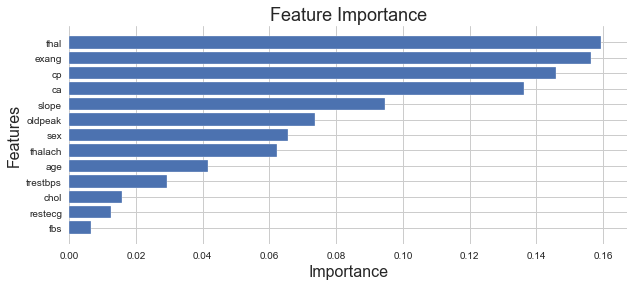

In [48]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_});
imp_feature = imp_feature.sort_values('Importance')
plt.figure(figsize=(10,4));
plt.title("Feature Importance", fontsize=18);
plt.xlabel("Importance", fontsize=16);
plt.ylabel("Features", fontsize=16);
plt.barh(imp_feature['Feature'],imp_feature['Importance']);
# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(14);
plt.show();

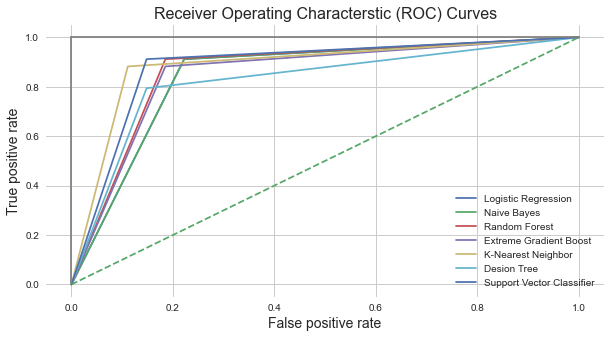

In [51]:
lr_false_positive_rate, lr_true_positive_rate,lr_threshold = roc_curve(y_test, lr_predict)
nb_false_positive_rate, nb_true_positive_rate,nb_threshold = roc_curve(y_test, nbpred)
rf_false_positive_rate, rf_true_positive_rate,rf_threshold = roc_curve(y_test, rf_predicted)                                                             
xgb_false_positive_rate, xgb_true_positive_rate,xgb_threshold = roc_curve(y_test, xgb_predicted)
knn_false_positive_rate, knn_true_positive_rate,knn_threshold = roc_curve(y_test, knn_predicted)
dt_false_positive_rate, dt_true_positive_rate,dt_threshold = roc_curve(y_test, dt_predicted)
svc_false_positive_rate, svc_true_positive_rate,svc_threshold = roc_curve(y_test, svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5));
plt.title('Receiver Operating Characterstic (ROC) Curves',fontsize=16);
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression');
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes');
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest');
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost');
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor');
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree');
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier');
plt.plot([0,1],ls='--');
plt.plot([0,0],[1,0],c='.5');
plt.plot([1,1],c='.5');
plt.ylabel('True positive rate', fontsize=14);
plt.xlabel('False positive rate',fontsize=14);
plt.legend();
plt.show();

In [54]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                                   'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 
                         'Accuracy': [lr_acc_score*100, nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,
                                      knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]}).sort_values('Accuracy', ascending=False)
model_ev

,Model,Accuracy
4,K-Nearest Neighbour,88.524590
6,Support Vector Machine,88.524590
2,Random Forest,86.885246
0,Logistic Regression,85.245902
1,Naive Bayes,85.245902
3,Extreme Gradient Boost,85.245902
5,Decision Tree,81.967213
